In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv("Data/balanceado/creditcard_2023.csv")

In [164]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 non-nu

In [165]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categoricas ; ", cat_cols)

int_cols = [col for col in df.columns if col not in cat_cols]
print("Não categoricas ; ", int_cols)

Categoricas ;  Index([], dtype='str')
Não categoricas ;  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [166]:
def Limites(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return upper, lower

In [167]:
out, norm = [], []

X = df.drop('Class', axis=1)
Y = df['Class']

for col in X.columns:
    sk = df[col].skew()
    print(f"Column [{col}] is {sk:.2f}", end = '\t')
    if sk > - 0.5 and sk < 0.5:
        print(f"{col} É simetrica")
        norm.append(col)
    elif sk > -1 and sk < -1:
        print(f"{col} +- simetrica")
        out.append(col)
    else:
        print(f"{col} É outlier")
        out.append(col)

Column [V1] is -0.08	V1 É simetrica
Column [V2] is 0.47	V2 É simetrica
Column [V3] is 0.01	V3 É simetrica
Column [V4] is -0.04	V4 É simetrica
Column [V5] is -0.24	V5 É simetrica
Column [V6] is -0.20	V6 É simetrica
Column [V7] is -0.73	V7 É outlier
Column [V8] is 0.30	V8 É simetrica
Column [V9] is 0.17	V9 É simetrica
Column [V10] is -0.55	V10 É outlier
Column [V11] is -0.02	V11 É simetrica
Column [V12] is 0.07	V12 É simetrica
Column [V13] is 0.01	V13 É simetrica
Column [V14] is 0.21	V14 É simetrica
Column [V15] is 0.01	V15 É simetrica
Column [V16] is 0.27	V16 É simetrica
Column [V17] is 0.37	V17 É simetrica
Column [V18] is 0.13	V18 É simetrica
Column [V19] is -0.01	V19 É simetrica
Column [V20] is 0.37	V20 É simetrica
Column [V21] is -0.11	V21 É simetrica
Column [V22] is 0.32	V22 É simetrica
Column [V23] is -0.10	V23 É simetrica
Column [V24] is 0.07	V24 É simetrica
Column [V25] is 0.02	V25 É simetrica
Column [V26] is -0.02	V26 É simetrica
Column [V27] is 0.40	V27 É simetrica
Column [V28]

In [168]:
def iqr(data, cols):
    resultados = {}
    for col in cols:
        upper, lower = Limites(data, col)
        outliers = df[(df[col]<lower) | (df[col]>upper)]
        resultados[col] = len(outliers)
        print(f"The {col} : {len(outliers)} outliers ou {(len(outliers)/len(data))* 100} % outliers")
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))
        print("depois: ")
        print(f"The {col} : {len(outliers)} outliers or {(len(outliers)/len(data)) * 100} % outliers")
        print("--------------------------------------------------------------------")

C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_22556\467037158.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_22556\467037158.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


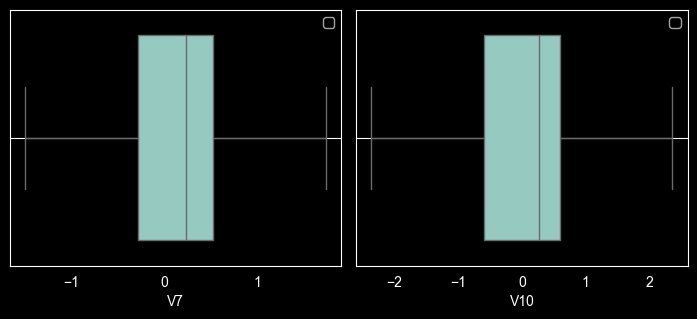

In [169]:
plt.figure(figsize=(14, 6))
k=1
for col in out:
    plt.subplot(2, 4, k)
    sns.boxplot(data= df, x=col, orient='v')
    plt.xlabel(col)
    plt.grid()
    plt.legend()
    k = k+1
plt.tight_layout()
plt.show()


In [170]:
iqr(df,out)

The V7 : 0 outliers ou 0.0 % outliers
depois: 
The V7 : 0 outliers or 0.0 % outliers
--------------------------------------------------------------------
The V10 : 0 outliers ou 0.0 % outliers
depois: 
The V10 : 0 outliers or 0.0 % outliers
--------------------------------------------------------------------


C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_22556\36186290.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_22556\36186290.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


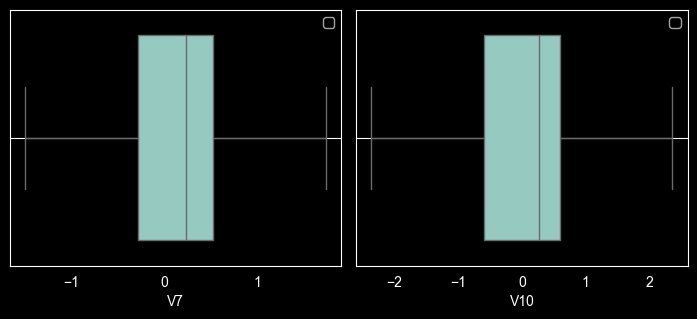

In [171]:
plt.figure(figsize=(14, 6))
k=1
for col in out:
    plt.subplot(2, 4, k)
    sns.boxplot(data= df, x=col, orient='v')
    plt.xlabel(col)
    plt.grid()
    plt.legend()
    k = k+1
plt.tight_layout()
plt.show()

In [172]:
y = df['Class'].values

In [173]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
0      -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1       0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2      -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3      -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4      -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
...          ...       ...       ...       ...       ...       ...       ...   
568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454 -0.370393   
568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148 -0.016935   
568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098 -0.070958   
568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148  0.580568   
568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493 -0.347613   

              V8        V9       V10  .

In [174]:
y= pd.DataFrame(y)

In [175]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [176]:
X = pd.DataFrame(X)

In [177]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

In [178]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [179]:
X_train.to_csv("Data/balanceado/X_train.csv",index=False)
y_train.to_csv("Data/balanceado/y_train.csv",index=False)

In [180]:
X_test.to_csv("Data/balanceado/X_test.csv",index=False)
y_test.to_csv("Data/balanceado/y_test.csv",index=False)